# Example of marginalization

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
x=np.random.normal(0,0.2,100)
y=np.random.normal(0.7,0.1,100)
z=np.hstack([x,y])

In [3]:
z2=np.random.normal(0.5,0.1,200)

In [4]:
z3=np.hstack([np.random.normal(-0.5,0.1,100),np.random.normal(-0.2,0.1,100)])

(array([ 7., 15., 18., 33., 23.,  3.,  6., 36., 37., 22.]),
 array([-0.4290368 , -0.29193496, -0.15483312, -0.01773128,  0.11937056,
         0.2564724 ,  0.39357424,  0.53067608,  0.66777792,  0.80487976,
         0.9419816 ]),
 <a list of 10 Patch objects>)

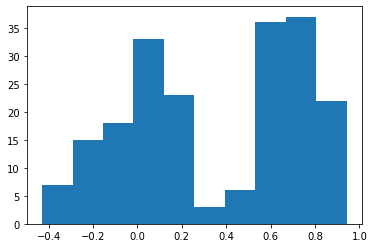

In [5]:
plt.hist(z)

In [6]:
from scipy import stats

In [7]:
kde=stats.gaussian_kde(z)

In [8]:
kde.covariance_factor()

0.3465724215775732

In [9]:
z_g=np.linspace(z.min(),z.max(),1000)

In [10]:
pdf=kde.evaluate(z_g)

(array([0.25528468, 0.54703861, 0.65644633, 1.20348494, 0.83879253,
        0.10940772, 0.21881544, 1.31289266, 1.3493619 , 0.80232329]),
 array([-0.4290368 , -0.29193496, -0.15483312, -0.01773128,  0.11937056,
         0.2564724 ,  0.39357424,  0.53067608,  0.66777792,  0.80487976,
         0.9419816 ]),
 <a list of 10 Patch objects>)

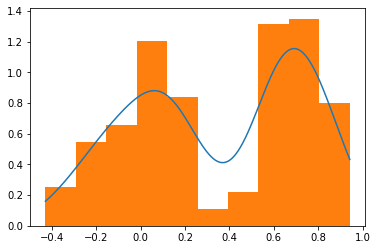

In [11]:
plt.plot(z_g,pdf)
plt.hist(z,density=True)

In [12]:
z_s=(z-z.mean())/(z.std())

1.0


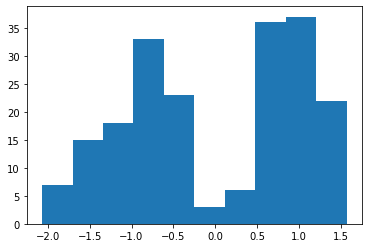

In [13]:
plt.hist(z_s)
print(z_s.std())

In [14]:
kde_s=stats.gaussian_kde(z_s)
kde_s.covariance_factor()

0.3465724215775732

In [15]:
z_gs=np.linspace(z_s.min(),z_s.max(),1000)
pdf_s=kde_s.evaluate(z_gs)

(array([0.09631317, 0.20638536, 0.24766244, 0.4540478 , 0.31645756,
        0.04127707, 0.08255415, 0.49532487, 0.5090839 , 0.30269853]),
 array([-2.06677747, -1.7033796 , -1.33998174, -0.97658388, -0.61318601,
        -0.24978815,  0.11360972,  0.47700758,  0.84040544,  1.20380331,
         1.56720117]),
 <a list of 10 Patch objects>)

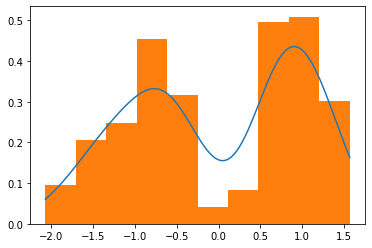

In [16]:
plt.plot(z_gs,pdf_s)
plt.hist(z_s,density=True)

In [17]:
kde_s.covariance_factor()

0.3465724215775732

In [18]:
kde_d=stats.gaussian_kde(z,bw_method=kde_s.covariance_factor())

In [19]:
pdf_d=kde_d.evaluate(z_g)

(array([0.25528468, 0.54703861, 0.65644633, 1.20348494, 0.83879253,
        0.10940772, 0.21881544, 1.31289266, 1.3493619 , 0.80232329]),
 array([-0.4290368 , -0.29193496, -0.15483312, -0.01773128,  0.11937056,
         0.2564724 ,  0.39357424,  0.53067608,  0.66777792,  0.80487976,
         0.9419816 ]),
 <a list of 10 Patch objects>)

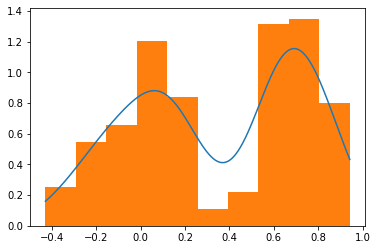

In [20]:
plt.plot(z_g,pdf_d)
plt.hist(z,density=True)

In [21]:
from sklearn.neighbors import KernelDensity

In [22]:
BW_1=0.3465724215775732*z.std()

In [23]:
kde_1d = KernelDensity(bandwidth = BW_1).fit(z[:, None])

In [24]:
pdf_k = np.exp(kde_1d.score_samples(z_g[:, None]))

(array([0.25528468, 0.54703861, 0.65644633, 1.20348494, 0.83879253,
        0.10940772, 0.21881544, 1.31289266, 1.3493619 , 0.80232329]),
 array([-0.4290368 , -0.29193496, -0.15483312, -0.01773128,  0.11937056,
         0.2564724 ,  0.39357424,  0.53067608,  0.66777792,  0.80487976,
         0.9419816 ]),
 <a list of 10 Patch objects>)

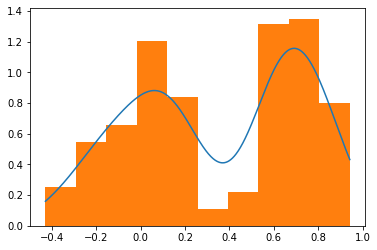

In [25]:
plt.plot(z_g,pdf_k)
plt.hist(z,density=True)

In [26]:
kde_s = KernelDensity(bandwidth = 0.3465).fit(z_s[:, None])
pdf_ks = np.exp(kde_s.score_samples(z_gs[:, None]))

(array([0.09631317, 0.20638536, 0.24766244, 0.4540478 , 0.31645756,
        0.04127707, 0.08255415, 0.49532487, 0.5090839 , 0.30269853]),
 array([-2.06677747, -1.7033796 , -1.33998174, -0.97658388, -0.61318601,
        -0.24978815,  0.11360972,  0.47700758,  0.84040544,  1.20380331,
         1.56720117]),
 <a list of 10 Patch objects>)

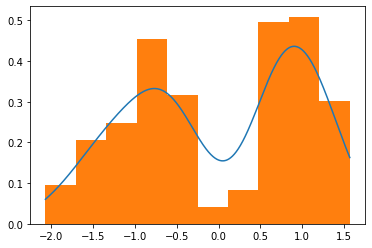

In [27]:
plt.plot(z_gs,pdf_ks)
plt.hist(z_s,density=True)

(array([0.25528468, 0.54703861, 0.65644633, 1.20348494, 0.83879253,
        0.10940772, 0.21881544, 1.31289266, 1.3493619 , 0.80232329]),
 array([-0.4290368 , -0.29193496, -0.15483312, -0.01773128,  0.11937056,
         0.2564724 ,  0.39357424,  0.53067608,  0.66777792,  0.80487976,
         0.9419816 ]),
 <a list of 10 Patch objects>)

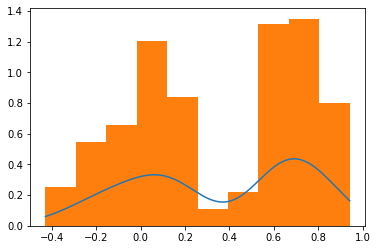

In [28]:
plt.plot(z_g,pdf_ks)
plt.hist(z,density=True)

## 2D

In [29]:
z_g=np.linspace(z.min(),z.max(),30)
z_g2=np.linspace(z2.min(),z2.max(),50)

In [30]:
z_g3=np.linspace(z3.min(),z3.max(),100)

In [31]:
z_s=(z-z.mean())/(z.std())
z2_s=(z2-z2.mean())/(z2.std())

In [32]:
data_example = np.vstack([z_s, z2_s]).T

In [33]:
kde_example = KernelDensity(bandwidth=0.34).fit(data_example)

In [34]:
z_gs=np.linspace(z_s.min(),z_s.max(),30)
z_gs2=np.linspace(z2_s.min(),z2_s.max(),50)

In [35]:
X, Y = np.meshgrid(z_gs, z_gs2)
xy = np.vstack([X.ravel(), Y.ravel()]).T

In [36]:
data_example.shape

(200, 2)

In [37]:
pdf=np.exp(kde_example.score_samples(xy))

In [38]:
pdf=pdf.reshape(50,30)

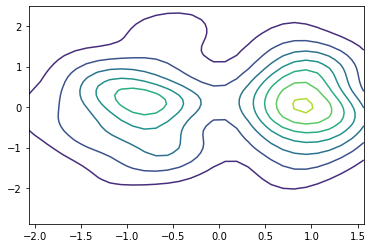

In [39]:
plt.contour(X,Y,pdf)

In [72]:
z_s=(z-z.mean())/(z.std())
z2_s=(z2-z2.mean())/(z2.std())
z3_s=(z3-z3.mean())/(z3.std())

In [73]:
z_gs=np.linspace(z_s.min(),z_s.max(),30)
z_gs2=np.linspace(z2_s.min(),z2_s.max(),50)
z_gs3=np.linspace(z3_s.min(),z3_s.max(),100)

In [74]:
data_example = np.vstack([z_s, z2_s, z3_s]).T

In [75]:
kde_example = KernelDensity(bandwidth=0.34).fit(data_example)

In [76]:
X, Y, Z = np.meshgrid(z_gs, z_gs2,z_gs3)
xyz = np.vstack([X.ravel(), Y.ravel(), Z.ravel()]).T

In [80]:
pdf=np.exp(kde_example.score_samples(xyz))

In [81]:
pdf=pdf.reshape(50,30,100)

In [82]:
Xp, Yp, = np.meshgrid(z_gs, z_gs2)

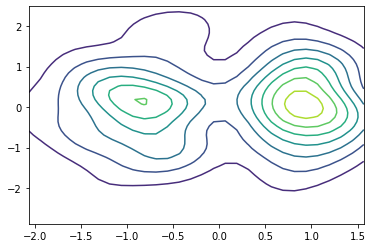

In [83]:
plt.contour(Xp,Yp,pdf.sum(axis=2))

In [84]:
Xo, Yo = np.meshgrid(z_g, z_g2)

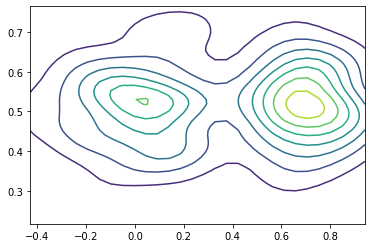

In [85]:
plt.contour(Xo,Yo,pdf.sum(axis=2))

In [51]:
priory = stats.norm.pdf(z_g2,0.55,0.005)

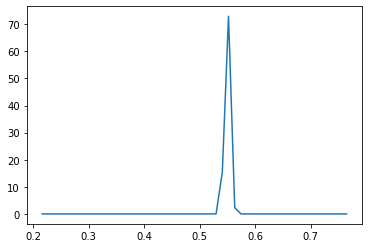

In [52]:
plt.plot(z_g2,priory)

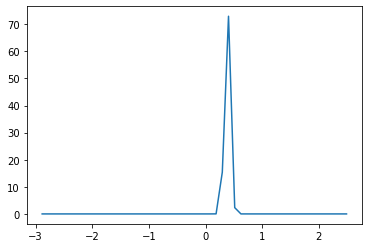

In [86]:
plt.plot(z_gs2,priory)

In [87]:
priorx = stats.norm.pdf(z_g,0.65,0.05)

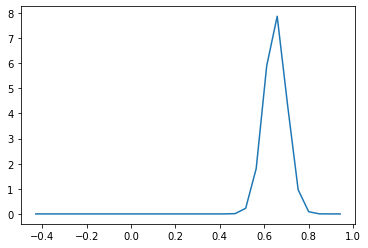

In [88]:
plt.plot(z_g,priorx)

In [127]:
eye = np.ones([50,30])*priorx

In [129]:
eye.T*priory

array([[0.0e+000, 0.0e+000, 0.0e+000, ..., 0.0e+000, 0.0e+000, 0.0e+000],
       [0.0e+000, 0.0e+000, 0.0e+000, ..., 0.0e+000, 0.0e+000, 0.0e+000],
       [0.0e+000, 0.0e+000, 0.0e+000, ..., 0.0e+000, 0.0e+000, 0.0e+000],
       ...,
       [0.0e+000, 0.0e+000, 0.0e+000, ..., 1.4e-322, 0.0e+000, 0.0e+000],
       [0.0e+000, 0.0e+000, 0.0e+000, ..., 0.0e+000, 0.0e+000, 0.0e+000],
       [0.0e+000, 0.0e+000, 0.0e+000, ..., 0.0e+000, 0.0e+000, 0.0e+000]])

In [105]:
pr2d=((np.ones([50,30]).T*priory).T)*priorx

In [134]:
pr2d.shape

(50, 30)

In [136]:
pr2d.sum(axis=0).shape

(30,)

In [137]:
(z_gs[1]-z_gs[0])

0.1253096082297347

In [130]:
norm_pr=(pr2d.sum(axis=0)*(z_gs[1]-z_gs[0])).sum()*(z_gs2[1]-z_gs2[0])

In [131]:
pr2d=pr2d/norm_pr

In [132]:
z_g2=np.linspace(z2.min(),z2.max(),50)

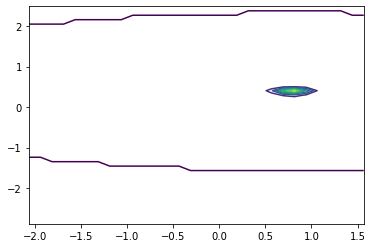

In [133]:
plt.contour(Xp,Yp,pr2d)

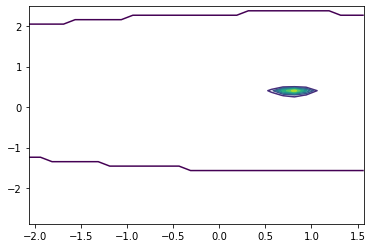

In [61]:
plt.contour(Xp,Yp,pr2d*pdf.sum(axis=2))

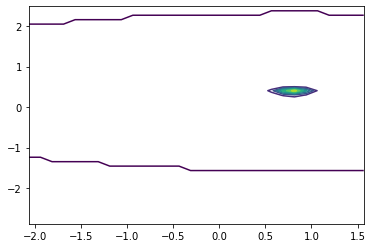

In [62]:
plt.contour(Xp,Yp,((pdf.T*pr2d.T).T).sum(axis=2))

In [63]:
post=(((pdf.T*pr2d.T).T).sum(axis=0)).sum(axis=0)

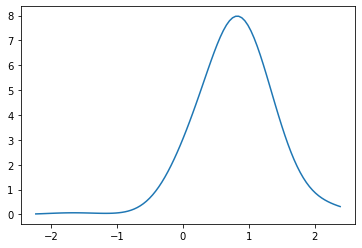

In [64]:
plt.plot(z_gs3,post)

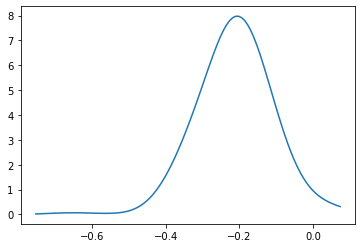

In [65]:
plt.plot(z_g3,post)

In [66]:
pr2d.sum()*(z_g2[1]-z_g2[0])

0.8136951272526326

In [142]:
pdf.T*pr2d.T

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [143]:
plt.contour(X,Y,(pdf.T*prior).T)

NameError: name 'prior' is not defined

In [ ]:
matrix=(pdf.T*prior).T

In [ ]:
post=matrix.sum(axis=0)

In [ ]:
plt.plot(z_gs,post)

In [ ]:
plt.plot(z_g,post)

In [ ]:
post.sum()*(z_g[1]-z_g[0])